In [108]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import time
import warnings
import matplotlib as mpl
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
torch.cuda.is_available()

True

In [109]:
train_all = pd.read_csv('train.csv')
test_all = pd.read_csv('test.csv')

datasets = [train_all, test_all]

In [110]:
train_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [112]:
train_all.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [113]:
# for dataset in datasets:
#   dataset.drop(["Alley", "MiscFeature", "PoolQC", "Fence"], axis=1, inplace = True)
#   for col in dataset.columns:
#     if dataset[col].isnull().sum() > 1000:
#       print(col, dataset[col].isnull().sum())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


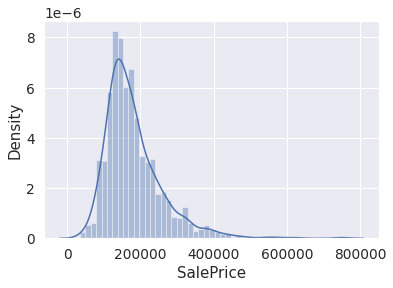

In [114]:
sns.distplot(train_all['SalePrice']);

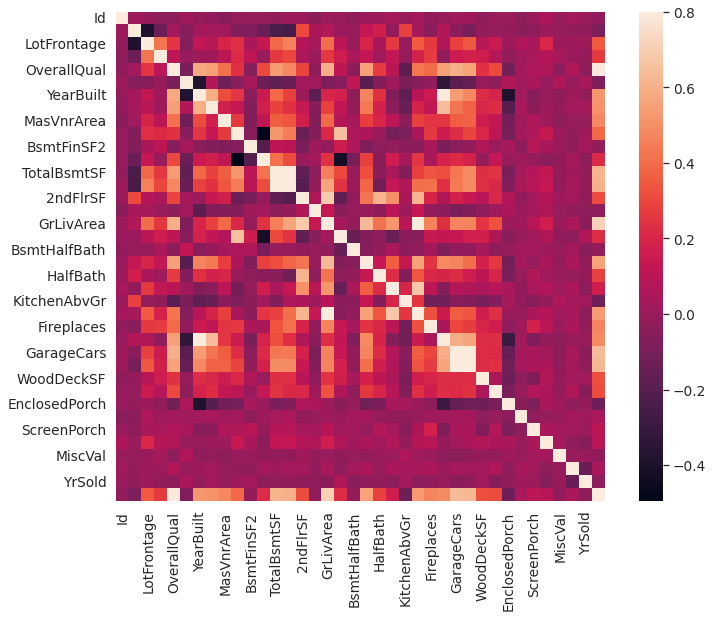

In [115]:
#correlation matrix
corrmat = train_all.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

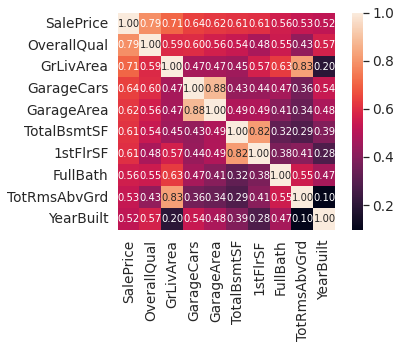

In [116]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_all[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [117]:
corrmat = train_all.corr()
corrmat["SalePrice"].sort_values(ascending=False)



SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [118]:
train_all = train_all.loc[:, ["SalePrice", "OverallQual", "GrLivArea", "GarageCars",
                              "TotalBsmtSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]]
test_all = test_all.loc[:, ["OverallQual", "GrLivArea", "GarageCars",
                            "TotalBsmtSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]]

train_all.describe()
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   GarageCars    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
 7   YearBuilt     1460 non-null   int64
 8   YearRemodAdd  1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


In [119]:
for col in test_all.columns:
  test_all[col].fillna(test_all[col].mean(), inplace=True)

In [120]:
train, valid = train_test_split(
    train_all, test_size=0.1, random_state=42, shuffle=True)

train_X, train_y = train.drop('SalePrice', axis=1), train['SalePrice']
valid_X, valid_y = valid.drop('SalePrice', axis=1), valid['SalePrice']
# num_pip = Pipeline([
#     ('imputer', SimpleImputer(strategy="median")),
#     ('std_scaler', StandardScaler()),
# ])

# train_X = num_pip.fit_transform(train_X)
train_X

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
907,7,2057,1,1017,1,6,1936,1987
782,7,1430,2,1413,2,6,2001,2002
952,5,768,1,768,1,5,1972,2003
620,3,864,0,864,1,5,1914,1950
669,4,1180,1,700,1,5,1922,1950
...,...,...,...,...,...,...,...,...
1095,6,1314,2,1314,2,6,2006,2006
1130,4,1981,2,1122,2,7,1928,1950
1294,5,864,2,864,1,5,1955,1990
860,7,1426,1,912,1,7,1918,1998


In [128]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.Sequential([
    keras.layers.Dense(16, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='elu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.05),
    keras.layers.Dense(128, activation='elu'),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.05),
    keras.layers.Dense(1)
])

In [129]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

In [130]:
model.fit(train_X, train_y, epochs=20, validation_data=(valid_X, valid_y))

Epoch 1/20
42/42 [==============================] - 1s 7ms/step - loss: 38535254016.0000 - val_loss: 37958455296.0000
Epoch 2/20
42/42 [==============================] - 0s 4ms/step - loss: 36846403584.0000 - val_loss: 9255774208.0000
Epoch 3/20
42/42 [==============================] - 0s 4ms/step - loss: 29702248448.0000 - val_loss: 34010763264.0000
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 16811084800.0000 - val_loss: 195122626560.0000
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 6111543808.0000 - val_loss: 177327652864.0000
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 2895752448.0000 - val_loss: 120780816384.0000
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: 2887689984.0000 - val_loss: 196713250816.0000
Epoch 8/20
42/42 [==============================] - 0s 4ms/step - loss: 2408972288.0000 - val_loss: 123032895488.0000
Epoch 9/20
42/42 [==============================] - 0s 4

In [134]:
y_pred = model.predict(test_all)
y_pred

array([[111928.82],
       [133335.06],
       [160672.1 ],
       ...,
       [135798.84],
       [125298.76],
       [186438.16]], dtype=float32)

In [135]:
prediction = pd.DataFrame(y_pred, columns=['SalePrice'])

prediction["Id"] = pd.read_csv('./test.csv')["Id"]

prediction.to_csv("./submit.csv", index=False, header=True)


# .to_csv('submit.csv')
# prediction

In [132]:
test_pred = model.predict(train_X[:5])
test_pred

array([[166322.94 ],
       [169924.1  ],
       [114318.22 ],
       [ 47694.562],
       [109144.516]], dtype=float32)

In [133]:
train_y[:5]

907    250000
782    187100
952    133900
620     67000
669    137500
Name: SalePrice, dtype: int64